# La teoría de la probabilidad
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Redes</code></p>

## La probabilidad
La probabilidad es una medida de la certidumbre de que ocurra un evento; su valor es un número entre 0 y 1, donde un evento imposible corresponde a cero y uno seguro corresponde a uno.

### Agenda
1. Marco teórico
1. Propiedades
1. Independencia de eventos
1. Ley de grandes números

In [3]:
# Importar módulos al cuaderno de jupyter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir e incluir nuevas funciones al cuaderno


## 1. Marco teórico
---
### 1.1. Definición:
La La teoría de probabilidad es la rama de las matemáticas que se ocupa de la incertidumbre en fenómenos aleatorios; proporcionando métodos para cuantificar las posibilidades asociadas a un un evento que no se puede predecir con certeza.

Se basa en:
* Un evento seguro tiene una probabilidad de 1
* Un evento imposible tiene una probabilidad de 0
* Un probabilidad de un evento aleatorio varia entre 0 y 1

### 1.2. Principios:
Como consecuencia directa de esta definición se puede expresar que dada una variable aleatoria A esta debe cumplir los siguientes principios:

\begin{align*}
Prob(A) = P(A) &\Rightarrow 0 ≤ P(A) ≤1  \\
B = !A &\Rightarrow P(B) = 1 − P(A) \\
P(A o B) = P(A+B) &\Rightarrow P(A+B) = P(A∪B) \\
P(A y B)=P(AB) &\Rightarrow P(AB) = P(A∩B) \\
P(A si B)=P(A/B) \\
\end{align*}


### 1.3. Propiedades:
Algunas de las reglas que podemos mencionar:

| Nombre | Ecuación | Nota |
|--|--|:--:|
| Numero de aciertos | $ P(A) = \lim\limits_{n \to \infty} \frac{a}{n} $ | (1) |
| Probabilidad a-priori | $ P(A) = \frac{c}{n} $ | (2) |
| Regla de la adición | $ P(A+B)=P(A)+P(B)−P(AB) $ |
| Regla de la multiplicación | $ P(AB)=P(A/B)P(B) = P(B/A)P(A) $ |
| Regla de la exclusión | $ P(AB)=0 \Rightarrow P(A+B)=P(A)+P(B) $ |
| Teorema de Bayes | $ P(A/B)= \frac{P(AB)}{P(B)}=P(B/A) ∗  \frac{P(A)}{P(B)} $ |

<p><small>
<div><sup>1</sup> n = número de intentos, a = aciertos </div>
<div><sup>2</sup> n = número de casos, c = coincidencias</div>
</small></p>

### <code>Ejemplo:</code> caja de laboratorio con resistencias
Una caja oscura de laboratorio contiene 20 resistencias, 5 resistencias de 100Ω y 15 resistencias de 50Ω. De la caja se extraen dos resistencias, una después de otra sin reponer la primera, determinar las siguientes probabilidades:

Probabilidades tomando una resistencia de la caja (a-priori):
* La probabilidad de que las primera resistencia sea de 100Ω
* La probabilidad de que las primera resistencia sea de 50Ω

Probabilidades al tomar la segunda resistencia:
* La probabilidad de que las dos resistencias sean de 100Ω
* La probabilidad de que las dos resistencias son de 50Ω
* La probabilidad de que la primera fue de 100Ω y la segunda de 50Ω
* La probabilidad de que la primera fue de 50Ω y la segunda de 100Ω

In [4]:
# Número de resistencias
resistencias_100 = 5
resistencias_50 = 15

# Probabilidades a_priori
total_casos  = resistencias_50 + resistencias_100
Pr_100 = resistencias_100/total_casos
Pr_50 = resistencias_50/total_casos
suma_1 = Pr_100 + Pr_50

# Salida
print(f"la probabilidad que en un primer intento la resistencia tomada sea de 100: {Pr_100:.2f}")
print(f"la probabilidad que en un primer intento la resistencia tomada sea de 50: {Pr_50:.2f}")
print(f"La suma de probabilidades primer intento: {suma_1:.1f}")

la probabilidad que en un primer intento la resistencia tomada sea de 100: 0.25
la probabilidad que en un primer intento la resistencia tomada sea de 50: 0.75
La suma de probabilidades primer intento: 1.0


In [5]:
# Probabilidades segundo intento
Pr_100_r100 = Pr_100 * (resistencias_100-1)/(total_casos-1)
Pr_50_r50 = Pr_50 * (resistencias_50-1)/(total_casos-1)
Pr_100_r50 = Pr_100 * (resistencias_50)/(total_casos-1) 
Pr_50_r100 = Pr_50 * (resistencias_100)/(total_casos-1)
suma_2 = Pr_100_r100 + Pr_50_r50 + Pr_100_r50 + Pr_50_r100 

# Salida
print(f"la probabilidad que dos resistencias tomadas sean de 100: {Pr_100_r100:.2f}", )
print(f"la probabilidad que dos resistencias tomadas sean de 100: {Pr_50_r50:.2f}", )
print(f"la probabilidad que en un primer intento la resistencia tomada sea de 100 y la segunda de 50: {Pr_100_r50:.2f}", )
print(f"la probabilidad que en un primer intento la resistencia tomada sea de 50 y la segunda de 100: {Pr_50_r100:.2f}", )
print(f"La suma de probabilidades segundo intento: {suma_2:.1f}")

la probabilidad que dos resistencias tomadas sean de 100: 0.05
la probabilidad que dos resistencias tomadas sean de 100: 0.55
la probabilidad que en un primer intento la resistencia tomada sea de 100 y la segunda de 50: 0.20
la probabilidad que en un primer intento la resistencia tomada sea de 50 y la segunda de 100: 0.20
La suma de probabilidades segundo intento: 1.0


## 3. Independencia
En teoría de probabilidad, podemos decir que dos eventos son independientes cuando la probabilidad de cada uno de ellos no se ve afecta porque el otro evento ocurra, es decir que no existe ninguna relación entre los eventos.

### 3.1. ley de grandes números
Una sucesión infinita de variables aleatorias independientes que tienen el mismo valor esperado convergen a la probabilidad subyacente del experimento.

* **Consecuencia:** Si bien un evento individual de una variable aleatoria es impredecible, el comportamiento de una cantidad suficientemente grande de eventos se puede predecir con un alto grado de certeza!

### <code>Ejemplo:</code> el lanzamiento de la moneda
Si una moneda de dos lados (cara y sello) es lanzada sucesivamente al aire y se registra el número de lanzamientos por cada intento, cual seria la tendencia a medida que aumenta el numero de intentos.

> En el experimento es claro que cada evento de lanzamiento no depende del evento anterior; cada lanzamiento es un suceso totalmente aislado el uno del otro y la probabilidad del resultado va a ser siempre 50% en cada lanzamiento.

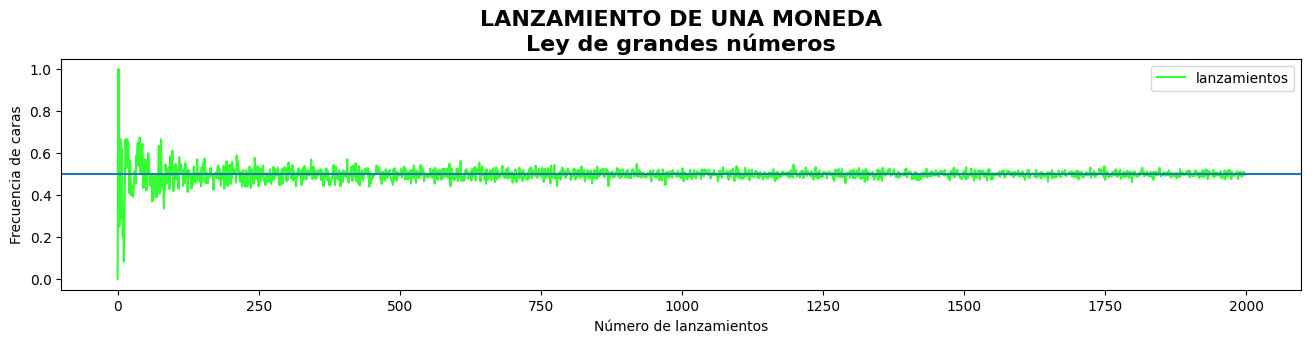

In [19]:
# Matriz de resultados vacía; 
resultados = []

# llenamos la matriz con números aleatorios
for lanzamiento in range(1,2000):
    # cara=1 sello=0
    lanzamiento = np.random.choice([0,1], lanzamiento) 
    caras = lanzamiento.mean()
    resultados.append(caras)

# Dataframe
df = pd.DataFrame({ 'lanzamientos' : resultados})

# Gráfica
df.plot(color="#33FF33",figsize=(16, 3))
plt.title("Lanzamiento de una moneda\n".upper() + "Ley de grandes números", fontsize=16, fontweight="bold")
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("Frecuencia de caras")
plt.show()

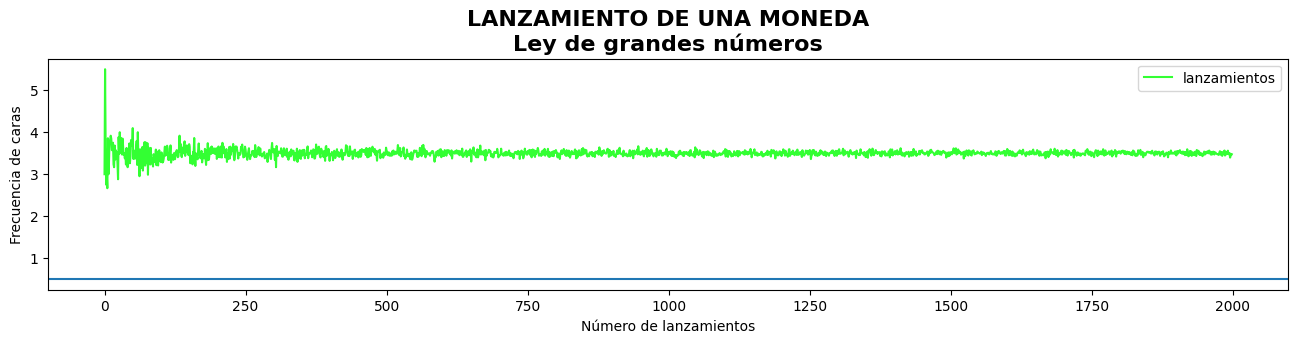

In [20]:
# Matriz de resultados vacía; 
resultados = []

# llenamos la matriz con números aleatorios
for lanzamiento in range(1,2000):
    lanzamiento = np.random.choice([1,2,3,4,5,6], lanzamiento) 
    caras = lanzamiento.mean()
    resultados.append(caras)

# Dataframe
df = pd.DataFrame({ 'lanzamientos' : resultados})

# Gráfica
df.plot(color="#33FF33",figsize=(16, 3))
plt.title("Lanzamiento de una moneda\n".upper() + "Ley de grandes números", fontsize=16, fontweight="bold")
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("Frecuencia de caras")
plt.show()

Si dos eventos son mutuamente excluyentes

\begin{gather*}
P
\end{gather*}

\begin{align}
P
\end{align}

---
## Mas Recursos

- [Probabilidad](https://es.wikipedia.org/wiki/Probabilidad) (Wikipedia)
- [Teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) (Wikipedia)
- [Ley de los grandes números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros) (Wikipedia)
